# LAB 9

In [30]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

# Get the data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/housing/"

In [3]:
data = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [7]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


All attributes are numerical, except the ocean_proximity field.

In [8]:
#This method shows a statistical summary of the numerical attributes 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,1101431.0,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),2375699.0,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


In [5]:
#Use top 4 features for each of the Classes (8 total features) drop the rest
#1-WindChill, Humidity, Temperature, Visibility
#2-WindChill, WindSpeed, Humidity, Distance
#3-WindChill, WindSpeed, Distance(mi), Pressure(Air)
#4-Distance, Temperature, Wind_Chill(F), Humidity
df2 = data.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
#df2 = data.filter(['Severity','Distance(mi)','Visibility(mi)'])
df2

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,2,NaN,36.9,91.0,NaN,0.747,29.68,10.0,91.0
2,2,NaN,36.0,97.0,NaN,0.055,29.70,10.0,97.0
3,2,NaN,39.0,55.0,NaN,0.123,29.65,10.0,55.0
4,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
...,...,...,...,...,...,...,...,...,...
2845337,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2845338,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2845339,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2845340,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [6]:
df2 = df2.dropna()
df2 = df2.reset_index(drop = True)
df2

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
2,2,29.2,35.6,100.0,8.1,1.427,29.66,10.0,100.0
3,2,30.0,33.1,92.0,3.5,0.521,29.63,0.5,92.0
4,2,31.8,39.0,70.0,11.5,0.491,29.59,10.0,70.0
...,...,...,...,...,...,...,...,...,...
2363634,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2363635,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2363636,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2363637,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [7]:
from sklearn.utils import resample

sev1 = df2[df2["Severity"] == 1]
sev2 = df2[df2["Severity"] == 2]
sev3 = df2[df2["Severity"] == 3]
sev4 = df2[df2["Severity"] == 4]
#df2_upsample = resample(spam_messages,
#             replace=True,
#             n_samples=len(ham_messages),
#             random_state=42)

print(sev1.shape)
print(sev2.shape)
print(sev3.shape)
print(sev4.shape)


(25539, 9)
(2179716, 9)
(80936, 9)
(77448, 9)


<AxesSubplot:ylabel='Type'>

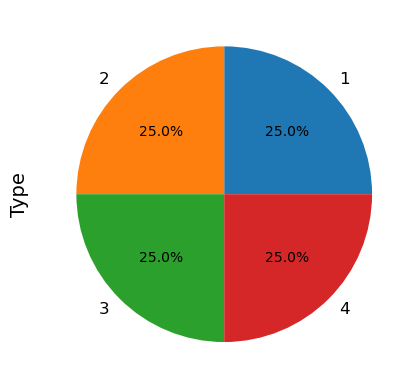

In [8]:
sev2_downsample = resample(sev2,
             replace=True,
             n_samples=len(sev1),
             random_state=42)
sev3_downsample = resample(sev3,
             replace=True,
             n_samples=len(sev1),
             random_state=42)
sev4_downsample = resample(sev4,
             replace=True,
             n_samples=len(sev1),
             random_state=42)
# print(sev4_downsample.shape)
# print(sev2.shape)
# print(sev2_downsample)
# print(sev4_downsample)

# data_upsampled = pd.concat([, spam_upsample])
pdList = [sev1,sev2_downsample,sev3_downsample,sev4_downsample]
df2_downsampled = pd.concat(pdList)
df2_downsampled.groupby('Severity').size().plot(kind='pie',
                                       y = "Severity",
                                       label = "Type",
                                       autopct='%1.1f%%')


In [9]:
df2_downsampled.Severity.value_counts()

1    25539
2    25539
3    25539
4    25539
Name: Severity, dtype: int64

In [10]:
X = df2_downsampled.iloc[:, 1:].values.round(decimals=0)
y = df2_downsampled.iloc[:, 0].values

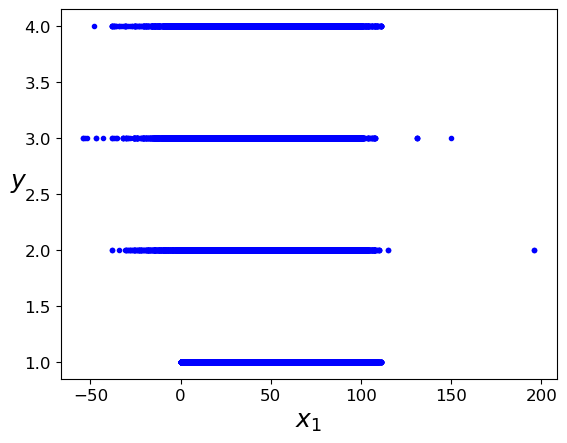

In [11]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show() # plotting the random generated data 

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) #train linear regression on X and y
lin_reg.intercept_, lin_reg.coef_ # learning parameters 

(2.030917994537773,
 array([-0.05262484,  0.04587628,  0.00353186, -0.00596219,  0.06522684,
         0.00595998,  0.02015507,  0.00353186]))

In [13]:
X_new = np.array([[0], [1], [2], [3], [4], [5], [6], [7]]) 
X_new_b = np.c_[np.ones((8, 1)), X_new]  # add x0 = 1 to each instance

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
predictions = model.predict(X_test)

In [18]:
X_test[0]


array([67., 67., 59.,  5.,  0., 30., 10., 59.])

In [19]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  1.0736876562921205
mean_absolute_error :  0.8942162527956374


In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) #train linear regression on X and y
lin_reg.intercept_, lin_reg.coef_ # learning parameters 

(2.030917994537773,
 array([-0.05262484,  0.04587628,  0.00353186, -0.00596219,  0.06522684,
         0.00595998,  0.02015507,  0.00353186]))

# Linear Regression Gradient Descent

In [21]:
m,n = X.shape

In [22]:
mu = X.mean(0) 
sigma = X.std(0) # standard deviation: max(x)-min(x)
xn = (X - mu) / sigma

In [23]:
xo = np.hstack((np.ones((m, 1)), xn))

In [24]:
repeat = 1000
lrate = 0.1
theta = np.zeros((n+1))
def computeCost(X, y, theta):
  m = len(y) # number of training examples
  diff = np.matmul(X, theta) - y
  J = 1 / (2 * m) * np.matmul(diff, diff)
  return J

In [25]:
def gradientDescent(X, y, theta, alpha, num_iters):
  # Initialize some useful values
  m = len(y) # number of training examples
  J_history = []
  # repeat until convergance
  for i in range(num_iters):
    hc = np.matmul(X, theta) - y
    theta -= alpha / m * np.matmul(X.transpose(), hc)
    # Save the cost J in every iteration
    J_history.append(computeCost(X, y, theta))
  return theta, J_history

In [26]:
theta, J_history = gradientDescent(xo, y, theta, lrate, repeat)
# Display gradient descent's result
print('Best theta computed from gradient descent: ')
print(f' {theta} ')

Best theta computed from gradient descent: 
 [ 2.50000000e+00 -4.97163779e-01  2.19618714e-01  7.99691883e-02
  2.10667676e-03  1.48371744e-01  1.19865501e-02  5.69837582e-02
  7.99691883e-02] 


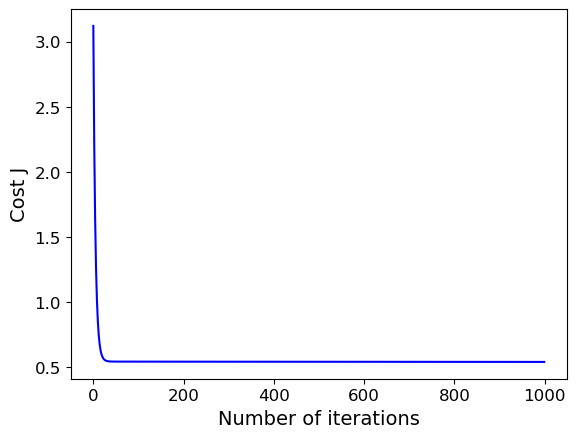

In [27]:
# Plot the convergence graph
plt.plot(np.arange(repeat), J_history, '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [28]:
y_pred = np.matmul(xo, theta)

In [31]:
from sklearn import metrics
# get RMSE error rate
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y, y_pred)))
# calculate our own accuracy where prediction within 10% is o
diff = (y_pred / y * 100)
print('Mean of results: ',diff.mean())
print('Deviation of results: ',diff.std())
print('Results within 10% support/resistance: ', len(np.where(np.logical_and(diff>=90, diff<=110))[0]) / m * 100)

RMSE:  1.0397182352054533
Mean of results:  125.75394345178844
Deviation of results:  64.66642385864458
Results within 10% support/resistance:  12.862680606131798


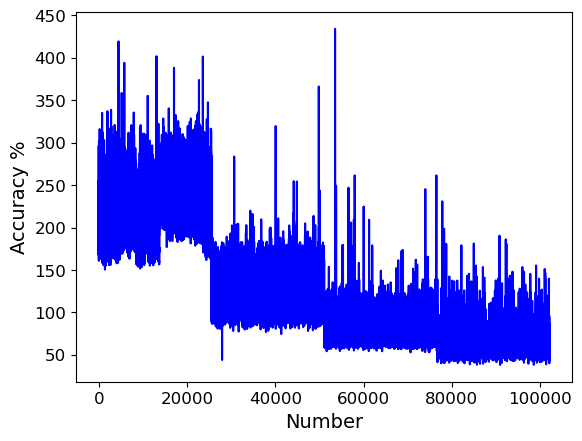

In [32]:
plt.plot(np.arange(m), diff, '-b')
plt.xlabel('Number')
plt.ylabel('Accuracy %')
plt.show()

# Logistic Regression

In [40]:
testData1 = df2_downsampled.copy()

In [41]:
testData1['Severity'] = testData1['Severity'].replace([1],0)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

In [43]:
testData1 = df2_downsampled.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
#df2 = data.filter(['Severity','Distance(mi)','Visibility(mi)'])
testData1

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
1493785,1,103.0,103.0,22.0,10.0,0.000,27.15,10.0,22.0
1495315,1,95.0,95.0,19.0,10.0,0.000,27.16,10.0,19.0
1507378,1,68.0,68.0,93.0,5.0,0.000,29.14,9.0,93.0
1509407,1,98.0,98.0,18.0,5.0,0.000,28.28,10.0,18.0
1510895,1,95.0,95.0,22.0,9.0,0.000,29.90,10.0,22.0
...,...,...,...,...,...,...,...,...,...
2001548,4,72.0,72.0,46.0,10.0,0.000,29.49,10.0,46.0
1874389,4,68.0,68.0,87.0,0.0,2.391,29.57,3.0,87.0
23230,4,21.2,26.6,85.0,4.6,0.880,30.35,10.0,85.0
14078,4,38.4,42.1,40.0,5.8,0.383,30.31,10.0,40.0


In [44]:
testData1['Severity'] = testData1['Severity'].replace([1],0)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

In [45]:
testData1 = testData1.dropna()
testData1 = testData1.reset_index(drop = True)
testData1

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,0,103.0,103.0,22.0,10.0,0.000,27.15,10.0,22.0
1,0,95.0,95.0,19.0,10.0,0.000,27.16,10.0,19.0
2,0,68.0,68.0,93.0,5.0,0.000,29.14,9.0,93.0
3,0,98.0,98.0,18.0,5.0,0.000,28.28,10.0,18.0
4,0,95.0,95.0,22.0,9.0,0.000,29.90,10.0,22.0
...,...,...,...,...,...,...,...,...,...
102151,0,72.0,72.0,46.0,10.0,0.000,29.49,10.0,46.0
102152,0,68.0,68.0,87.0,0.0,2.391,29.57,3.0,87.0
102153,0,21.2,26.6,85.0,4.6,0.880,30.35,10.0,85.0
102154,0,38.4,42.1,40.0,5.8,0.383,30.31,10.0,40.0


In [88]:
X = testData1.iloc[:, 1:]
y = testData1.iloc[:, 0].values
X

,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,103.0,103.0,22.0,10.0,0.000,27.15,10.0,22.0
1,95.0,95.0,19.0,10.0,0.000,27.16,10.0,19.0
2,68.0,68.0,93.0,5.0,0.000,29.14,9.0,93.0
3,98.0,98.0,18.0,5.0,0.000,28.28,10.0,18.0
4,95.0,95.0,22.0,9.0,0.000,29.90,10.0,22.0
...,...,...,...,...,...,...,...,...
102151,72.0,72.0,46.0,10.0,0.000,29.49,10.0,46.0
102152,68.0,68.0,87.0,0.0,2.391,29.57,3.0,87.0
102153,21.2,26.6,85.0,4.6,0.880,30.35,10.0,85.0
102154,38.4,42.1,40.0,5.8,0.383,30.31,10.0,40.0


In [89]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


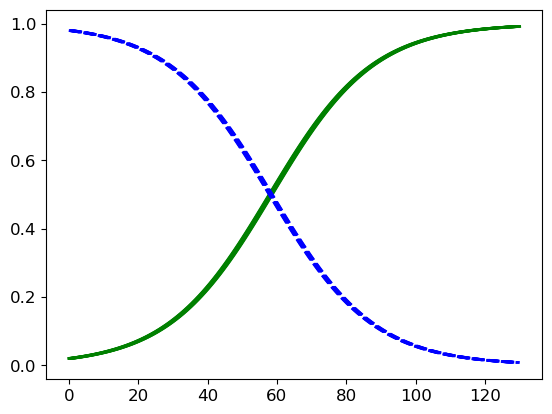

In [95]:
X_new = np.linspace(0, 130, 1000).reshape(-1, 8)
y_proba = log_reg.predict_proba(X_new) # estimated probability computed by the model, we use one feature (the petal width)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="2") # green curve plots estimated  Severity 2
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="0") # blue dotted line computes estimated probability of not Severity 2

In [27]:
df2_downsampled.corr()

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
Severity,1.000000,-0.316466,-0.310182,0.235975,-0.004451,0.176628,0.067009,-0.056118,0.235975
Wind_Chill(F),-0.316466,1.000000,0.994309,-0.416289,-0.032965,-0.111903,-0.064509,0.194803,-0.416289
Temperature(F),-0.310182,0.994309,1.000000,-0.439437,0.020307,-0.106371,-0.066411,0.192943,-0.439437
Humidity(%),0.235975,-0.416289,-0.439437,1.000000,-0.176241,0.075533,0.288547,-0.355523,1.000000
Wind_Speed(mph),-0.004451,-0.032965,0.020307,-0.176241,1.000000,0.012101,-0.044929,0.000427,-0.176241
Distance(mi),0.176628,-0.111903,-0.106371,0.075533,0.012101,1.000000,-0.024977,-0.050592,0.075533
Pressure(in),0.067009,-0.064509,-0.066411,0.288547,-0.044929,-0.024977,1.000000,-0.080606,0.288547
Visibility(mi),-0.056118,0.194803,0.192943,-0.355523,0.000427,-0.050592,-0.080606,1.000000,-0.355523
Humidity(%),0.235975,-0.416289,-0.439437,1.000000,-0.176241,0.075533,0.288547,-0.355523,1.000000
